In [4]:
import re
import json
import requests
from PIL import Image
from bs4 import BeautifulSoup

In [5]:
search = input()

love


In [7]:
url = "https://spotify23.p.rapidapi.com/search/"

querystring = {"q":{search},"type":"R&B","offset":"0","limit":"1","numberOfTopResults":"1"}

headers = {
	"X-RapidAPI-Host": "spotify23.p.rapidapi.com",
	"X-RapidAPI-Key": "f6f7ea39edmsh3b3072eed314667p141754jsn35fc580d2bab"
}

response = requests.request("GET", url, headers=headers, params=querystring)

print(response)

<Response [200]>


In [8]:
jtxt = json.loads(response.text)
jtxt

{'albums': {'totalCount': 1000,
  'items': [{'data': {'uri': 'spotify:album:1NAmidJlEaVgA3MpcPFYGq',
     'name': 'Lover',
     'artists': {'items': [{'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02',
        'profile': {'name': 'Taylor Swift'}}]},
     'coverArt': {'sources': [{'url': 'https://i.scdn.co/image/ab67616d00001e02e787cffec20aa2a396a61647',
        'width': 300,
        'height': 300},
       {'url': 'https://i.scdn.co/image/ab67616d00004851e787cffec20aa2a396a61647',
        'width': 64,
        'height': 64},
       {'url': 'https://i.scdn.co/image/ab67616d0000b273e787cffec20aa2a396a61647',
        'width': 640,
        'height': 640}]},
     'date': {'year': 2019}}}]},
 'artists': {'totalCount': 1000,
  'items': [{'data': {'uri': 'spotify:artist:33tFkBLsl6f8TjKkV0uF0C',
     'profile': {'name': 'Lovejoy'},
     'visuals': {'avatarImage': {'sources': [{'url': 'https://i.scdn.co/image/ab6761610000e5ebec843a0a44ebd65034c11026',
         'width': 640,
         'height': 640},
 

In [10]:
for it in jtxt["albums"]["items"]:
    song_Title = it['data']['name']
    artistName = it['data']['artists']["items"][0]['profile']['name']
artistName   , song_Title

('Taylor Swift', 'Lover')

In [11]:
for it in jtxt["albums"]["items"]:
    alb_link = it['data']['coverArt']['sources'][0]['url']
    Album_cover = Image.open(requests.get(alb_link, stream=True).raw)

    

In [12]:
so = re.sub(" ", "-", song_Title)
song = re.sub("'", "", so)
ar = re.sub(" ","-",artistName)
artist_name = re.sub("'"," ",ar)

res = requests.get(f'https://genius.com/{artist_name}-{song}-lyrics')
#print(res)
art_text = BeautifulSoup(res.text, 'html.parser')
spans = art_text.find_all('span', {'class': 'LabelWithIcon__Label-sc-1ri57wg-1 kMItKF'})
    


In [61]:
check = 0

for span in spans:
    if(check == 1):
        views = span.text
        check = 0
    else:
        check = 1

In [62]:
# art_text

In [64]:
# get likes data
rst = requests.get(f'http://www.songlyrics.com/{artist_name}/{song}/')
art_te = BeautifulSoup(rst.text, 'html.parser')
span = art_te.find('span', {'id': 'fbbox-total'})
likes = re.sub(r'(\n?|\t?)','',span.text)


In [74]:
print('Title: ',song_Title)
print('Artist: ',artistName)
print('Views: ',views,' and Likes: ',likes)

print('Album Cover: ')
Album_cover.show()

Title:  LIFE'S A TRIP
Artist:  Trippie Redd
Views:  2.1M  and Likes:  55k
Album Cover: 


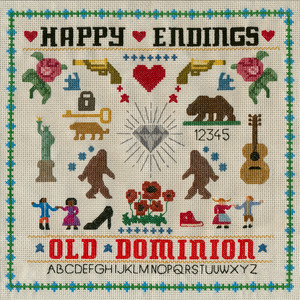

In [69]:
from youtube_dl import YoutubeDL

audio_downloder = YoutubeDL({'format':'bestaudio'})



In [67]:
pip install --upgrade youtube-dl


  Using cached youtube_dl-2021.12.17-py2.py3-none-any.whl (1.9 MB)
You should consider upgrading via the '/usr/local/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [72]:
ad = audio_downloder.extract_info('https://www.youtube.com/watch?v=j_Pw9EFeIME')

[youtube] j_Pw9EFeIME: Downloading webpage
[download] Best Relaxing Lofi Songs That Really Makes You Relax And Also To Chill _Study_Refreshing_ Hindi Lofi-j_Pw9EFeIME.webm has already been downloaded
[download] 100% of 74.96MiB


In [73]:
ad

{'id': 'j_Pw9EFeIME',
 'title': 'Best Relaxing Lofi Songs That Really Makes You Relax And Also To Chill \\Study\\Refreshing\\ Hindi Lofi',
 'formats': [{'asr': 48000,
   'filesize': 30771965,
   'format_id': '249',
   'format_note': 'tiny',
   'fps': None,
   'height': None,
   'quality': 0,
   'tbr': 53.207,
   'url': 'https://rr3---sn-cxab5jvh-cg0ek.googlevideo.com/videoplayback?expire=1653420883&ei=896MYs68I4rOgAf8lI6ABw&ip=2a02%3Aa03f%3A894a%3A6800%3A58ff%3A5883%3Ae799%3A93c9&id=o-AAMV65sIE05xPE-uZsPtdQe6WiK0P0ktj4CF4jOdl8WN&itag=249&source=youtube&requiressl=yes&mh=kq&mm=31%2C29&mn=sn-cxab5jvh-cg0ek%2Csn-25glene7&ms=au%2Crdu&mv=m&mvi=3&pl=42&initcwndbps=970000&spc=4ocVC6kei2vuf1SBJfoCThkdSrIY&vprv=1&mime=audio%2Fwebm&ns=qw2hSQ4wiM5appJQwyUhcSAG&gir=yes&clen=30771965&dur=4626.721&lmt=1651522385944138&mt=1653398959&fvip=6&keepalive=yes&fexp=24001373%2C24007246&c=WEB&txp=5532434&n=pooKoLOUuFpDqFrA4C7&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cspc%2Cvprv%2Cmime%2Cns%